In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from datetime import datetime
import json
from wordcloud import WordCloud

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings(action="ignore")

# Goal : Predict Customer Life-time Value (CLV )for an Auto Insurance Company.
Customer lifetime value is the net profit acquired from a customer throughout a company’s relationship with them.

Knowing each customer’s customer lifetime value helps you know how much you should be spending on customer acquisition. A customer’s acquisition cost could be more than what they spend on their purchase, but if you nurture that relationship, their CLV may grow to an amount that’s well worth the investment. That’s just one of the many reasons why success in the customer-centered economy means understanding the importance of customer lifetime value.

In [59]:
df = pd.read_csv('Marketing-Customer-Value-Analysis.csv')
df.sort_values('Customer Lifetime Value')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6037,UM17151,California,1898.01,No,Basic,Bachelor,2/26/11,Unemployed,M,0,...,91,3,1,Personal Auto,Personal L2,Offer1,Agent,413.61,Two-Door Car,Medsize
2210,CI68869,Arizona,1898.68,No,Basic,College,1/8/11,Unemployed,F,0,...,20,5,1,Personal Auto,Personal L3,Offer3,Agent,702.02,Two-Door Car,Small
2771,XT54610,California,1904.00,No,Basic,Bachelor,1/14/11,Unemployed,F,0,...,7,3,1,Personal Auto,Personal L1,Offer1,Agent,302.40,Four-Door Car,Medsize
7083,EH70612,California,1918.12,No,Basic,College,2/15/11,Unemployed,M,0,...,54,2,1,Personal Auto,Personal L1,Offer1,Branch,439.20,Two-Door Car,Small
6711,XI84293,Oregon,1940.98,No,Basic,High School or Below,2/7/11,Unemployed,M,0,...,40,3,1,Personal Auto,Personal L3,Offer3,Call Center,475.20,Two-Door Car,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,SK66747,Washington,66025.75,No,Basic,Bachelor,2/22/11,Employed,M,33481,...,46,0,2,Personal Auto,Personal L3,Offer1,Agent,1194.89,Luxury SUV,Medsize
7283,KH55886,Oregon,67907.27,No,Premium,Bachelor,2/5/11,Employed,M,78310,...,18,1,2,Personal Auto,Personal L1,Offer1,Agent,151.71,Sports Car,Medsize
6252,BP23267,California,73225.96,No,Extended,Bachelor,2/9/11,Employed,F,39547,...,21,0,2,Personal Auto,Personal L3,Offer1,Branch,969.60,Luxury SUV,Medsize
1974,YC54142,Washington,74228.52,No,Extended,High School or Below,1/26/11,Unemployed,M,0,...,34,0,2,Personal Auto,Personal L1,Offer1,Branch,1742.40,Luxury Car,Medsize


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [113]:
df.head().T

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2763.52,6979.54,12887.43,7645.86,2813.69
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,56274,0,48767,0,43836


In [12]:
#lets edit date format
df['Effective To Date']= df['Effective To Date'].astype('datetime64[ns]')

There are 9134 Observations of 24  Different Variable. (mix of categorical and continous DataType)

Dependent Variable is Customer Life Time Value as we have to predict the CLV.

Independent Variables are: Customer, StateCustomerLifetimeValue, Response, Coverage, Education, EffectiveToDate, EmploymentStatus, Gender, Income, LocationCode, MaritalStatus, MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPoliciesPolicyType, Policy, RenewOfferType, SalesChannel, TotalClaimAmountVehicleClass, VehicleSize

Continues Independed Variables are : CustomerLifetimeValue, Income,MonthlyPremiumAuto, MonthsSinceLastClaim, MonthsSincePolicyInception, NumberofOpenComplaints, NumberofPolicies, TotalClaimAmount



In [15]:
df.describe()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


In [35]:
df.isnull().sum()


Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

## Regression Analysis with Continuous Variables Only

In [32]:
df_cont =df.select_dtypes(include=['int64','float'])
df_cont =df_cont.drop(['Customer Lifetime Value'], axis = 1)

In [33]:
y = df['Customer Lifetime Value']
x = df_cont


In [34]:
import statsmodels.api as sm

x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.160
Model:                                 OLS   Adj. R-squared:                  0.160
Method:                      Least Squares   F-statistic:                     248.6
Date:                     Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                             14:11:38   Log-Likelihood:                -92862.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9126   BIC:                         1.858e+05
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           131.4138    274.191      0.479      0.632    -406.063     668.890
Income                            0.0050      0.002      2.060      0.039       0.000       0.010
Monthly Premium Auto             82.6770      2.582     32.027      0.000      77.617      87.737
Months Since Last Claim           6.9866      6.552      1.066      0.286      -5.858      19.831
Months Since Policy Inception     0.4687      2.365      0.198      0.843      -4.167       5.105
Number of Open Complaints      -238.0521     72.412     -3.287      0.001    -379.996     -96.108
Number of Policies               76.7845     27.583      2.784      0.005      22.715     130.854
Total Claim Amount               -0.6586      0.327     -2.014      0.044      -1.300      -0.018
==============================================================================
Omnibus:                     5684.197   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65358.256
Skew:                           2.861   Prob(JB):                         0.00
Kurtosis:                      14.789   Cond. No.                     2.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

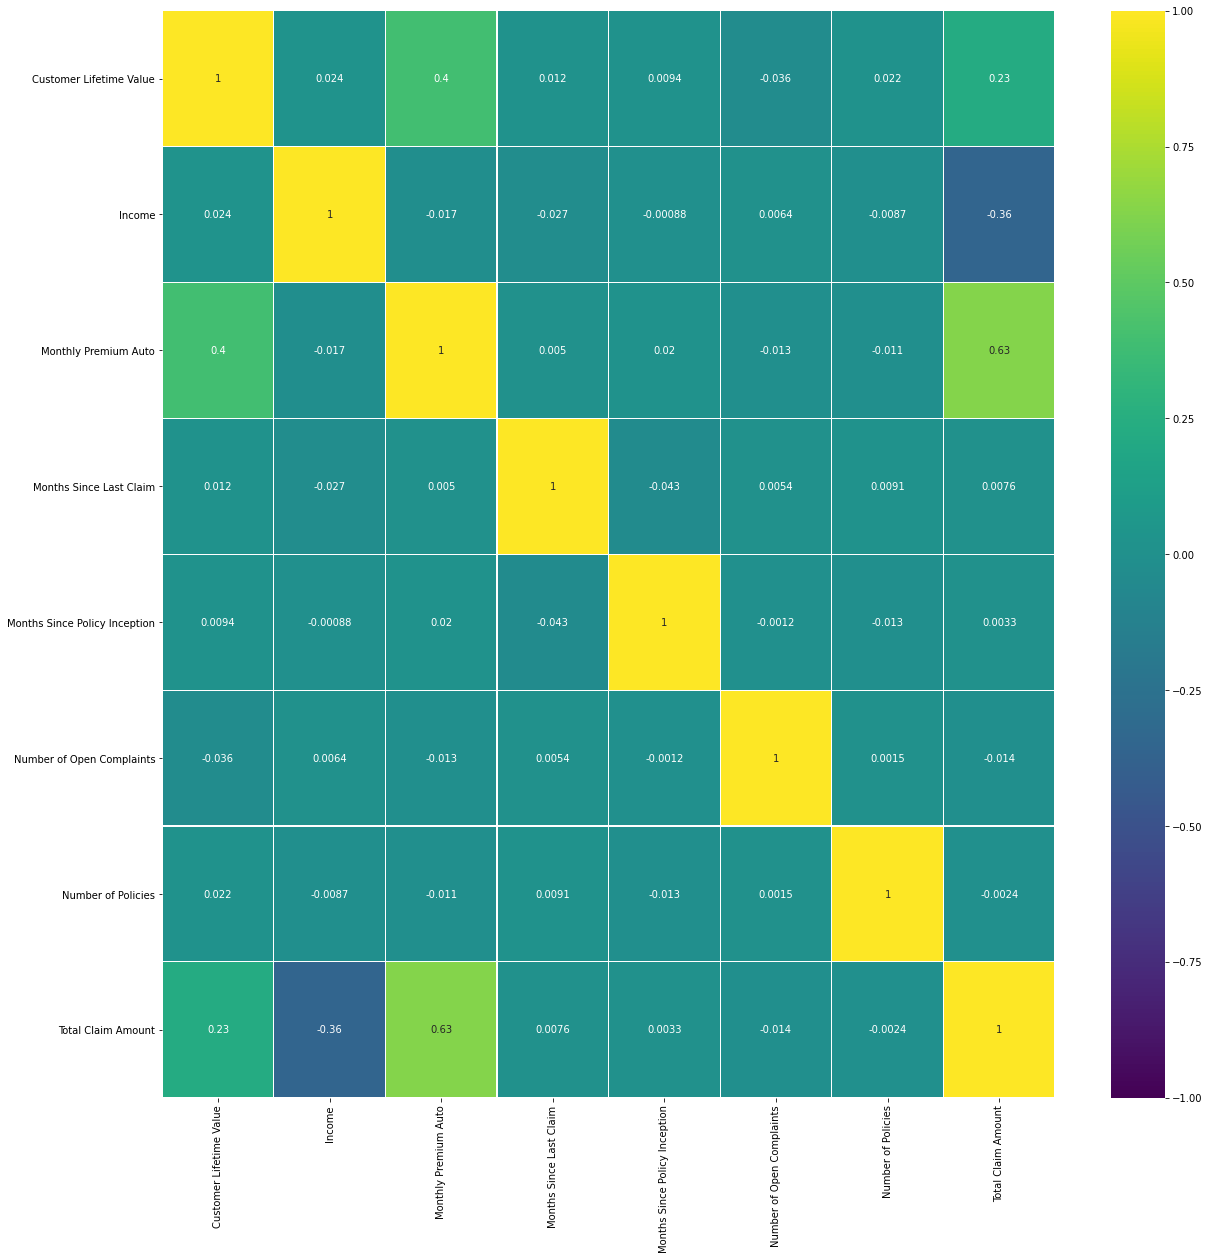

In [36]:
df_kor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

## Regression Analysis with Categorical Variables


In [46]:

cat_df = df.select_dtypes(include='object')
cat_df = cat_df.drop(['Customer'], axis = 1)
cols = cat_df.columns

In [48]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_df[cols]:
    cat_df[col] = lb.fit_transform(cat_df[col])

In [50]:
x2 = cat_df

x2 = sm.add_constant(x2)
results = sm.OLS(y, x2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.043
Model:                                 OLS   Adj. R-squared:                  0.042
Method:                      Least Squares   F-statistic:                     29.48
Date:                     Thu, 28 May 2020   Prob (F-statistic):           1.91e-77
Time:                             15:02:48   Log-Likelihood:                -93457.
No. Observations:                     9134   AIC:                         1.869e+05
Df Residuals:                         9119   BIC:                         1.871e+05
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6995.5343    354.686     19.723      0.000    6300.271    7690.798
State               35.9925     54.685      0.658      0.510     -71.202     143.187
Response          -459.1205    205.461     -2.235      0.025    -861.871     -56.370
Coverage          1738.4969    107.552     16.164      0.000    1527.671    1949.323
Education          126.6398     51.095      2.479      0.013      26.482     226.798
EmploymentStatus  -184.8450     55.403     -3.336      0.001    -293.448     -76.242
Gender            -103.1645    141.183     -0.731      0.465    -379.916     173.587
Location Code       79.7723    116.311      0.686      0.493    -148.223     307.768
Marital Status    -230.4580    116.987     -1.970      0.049    -459.779      -1.137
Policy Type        419.2732    311.371      1.347      0.178    -191.083    1029.630
Policy             -45.0494     92.281     -0.488      0.625    -225.940     135.842
Renew Offer Type  -478.9075     72.286     -6.625      0.000    -620.603    -337.212
Sales Channel       44.2635     66.626      0.664      0.506     -86.339     174.866
Vehicle Class      282.1764     33.988      8.302      0.000     215.552     348.801
Vehicle Size       233.8855    131.239      1.782      0.075     -23.372     491.143
==============================================================================
Omnibus:                     6052.642   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86625.170
Skew:                           3.029   Prob(JB):                         0.00
Kurtosis:                      16.817   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
cat_df.head().T

,0,1,2,3,4
State,4,0,2,1,4
Response,0,0,0,0,0
Coverage,0,1,2,0,0
Education,0,0,0,0,0
EmploymentStatus,1,4,1,4,1
Gender,0,0,0,1,1
Location Code,1,1,1,1,0
Marital Status,1,2,1,1,2
Policy Type,0,1,1,0,1
Policy,2,5,5,1,3


## Regression Analysis with bith Continous and Categorical Variables

In [60]:
all_df = pd.concat([df_cont,cat_df], axis = 1)
all_df

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,Coverage,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,56274,69,32,5,0,1,384.81,4,0,0,...,1,0,1,1,0,2,0,0,5,1
1,0,94,13,42,0,8,1131.46,0,0,1,...,4,0,1,2,1,5,2,0,0,1
2,48767,108,18,38,0,2,566.47,2,0,2,...,1,0,1,1,1,5,0,0,5,1
3,0,106,18,65,0,7,529.88,1,0,0,...,4,1,1,1,0,1,0,2,3,1
4,43836,73,12,44,0,1,138.13,4,0,0,...,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,71941,73,18,89,0,2,198.23,1,0,0,...,1,1,2,1,1,3,1,3,0,1
9130,21604,79,14,28,0,1,379.20,1,1,1,...,1,0,1,0,0,2,0,1,0,1
9131,0,85,9,37,3,2,790.78,1,0,1,...,4,1,1,2,0,1,0,1,0,1
9132,21941,96,34,3,0,3,691.20,1,0,1,...,1,1,1,1,1,4,2,1,0,0


In [61]:
x3 = all_df

x3 = sm.add_constant(x3)
results = sm.OLS(y, x3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.165
Model:                                 OLS   Adj. R-squared:                  0.163
Method:                      Least Squares   F-statistic:                     85.81
Date:                     Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                             16:37:12   Log-Likelihood:                -92835.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9112   BIC:                         1.859e+05
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           531.5725    473.375      1.123      0.261    -396.349    1459.494
Income                            0.0022      0.003      0.669      0.504      -0.004       0.009
Monthly Premium Auto             82.6770      2.925     28.270      0.000      76.944      88.410
Months Since Last Claim           6.7966      6.546      1.038      0.299      -6.036      19.629
Months Since Policy Inception    -0.7811      2.373     -0.329      0.742      -5.433       3.871
Number of Open Complaints      -247.8781     72.360     -3.426      0.001    -389.719    -106.037
Number of Policies               63.2701     27.663      2.287      0.022       9.044     117.496
Total Claim Amount               -0.5824      0.362     -1.609      0.108      -1.292       0.127
State                            28.4756     51.117      0.557      0.577     -71.726     128.677
Response                       -448.3788    192.408     -2.330      0.020    -825.541     -71.217
Coverage                       -183.7890    113.701     -1.616      0.106    -406.669      39.091
Education                        93.0832     47.790      1.948      0.051      -0.597     186.763
EmploymentStatus               -106.4348     73.604     -1.446      0.148    -250.715      37.845
Gender                         -144.5589    132.636     -1.090      0.276    -404.556     115.438
Location Code                   103.5590    116.578      0.888      0.374    -124.961     332.079
Marital Status                 -237.2764    110.660     -2.144      0.032    -454.195     -20.358
Policy Type                     448.5882    291.059      1.541      0.123    -121.953    1019.130
Policy                          -47.9853     86.264     -0.556      0.578    -217.082     121.112
Renew Offer Type               -348.5079     68.493     -5.088      0.000    -482.770    -214.245
Sales Channel                    23.5601     62.295      0.378      0.705     -98.551     145.672
Vehicle Class                    46.4930     32.422      1.434      0.152     -17.060     110.047
Vehicle Size                    186.6798    123.372      1.513      0.130     -55.157     428.517
==============================================================================
Omnibus:                     5665.297   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64590.396
Skew:                           2.852   Prob(JB):                         0.00
Kurtosis:                      14.713   Cond. No.                     3.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[

In [62]:
significant_cols = ['Monthly Premium Auto',
                    'Number of Open Complaints','Number of Policies','Response','Education',
                    'Marital Status','Renew Offer Type']

In [92]:

#regression with only significant variables

x4 = all_df[significant_cols]

x4 = sm.add_constant(x4)
results = sm.OLS(y, x4).fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.162
Model:                                 OLS   Adj. R-squared:                  0.162
Method:                      Least Squares   F-statistic:                     252.4
Date:                     Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                             14:09:32   Log-Likelihood:                -92851.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9126   BIC:                         1.858e+05
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1237.2379    266.621      4.640      0.000     714.600    1759.875
Monthly Premium Auto         78.4925      1.919     40.893      0.000      74.730      82.255
Number of Open Complaints  -245.9697     72.388     -3.398      0.001    -387.867    -104.073
Number of Policies           64.4859     27.658      2.332      0.020      10.270     118.701
Response                   -469.4454    191.595     -2.450      0.014    -845.014     -93.877
Education                    94.6957     47.786      1.982      0.048       1.025     188.367
Marital Status             -374.6216    103.946     -3.604      0.000    -578.379    -170.864
Renew Offer Type           -315.7296     66.903     -4.719      0.000    -446.874    -184.585
==============================================================================
Omnibus:                     5673.197   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64844.669
Skew:                           2.856   Prob(JB):                         0.00
Kurtosis:                      14.737   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
x4_train, x4_test, y_train, y_test = train_test_split(x4, y, test_size = 0.25, random_state = 450)

print('Train Data Count: {}'.format(x4_train.shape[0]))
print('Test Data Count: {}'.format(x4_test.shape[0]))


Train Data Count: 6850
Test Data Count: 2284


In [95]:
x4_train = sm.add_constant(x4_train)
results = sm.OLS(y_train, x4_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.170
Model:                                 OLS   Adj. R-squared:                  0.169
Method:                      Least Squares   F-statistic:                     200.4
Date:                     Fri, 29 May 2020   Prob (F-statistic):          1.80e-271
Time:                             14:09:54   Log-Likelihood:                -69569.
No. Observations:                     6850   AIC:                         1.392e+05
Df Residuals:                         6842   BIC:                         1.392e+05
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1108.4761    305.134      3.633      0.000     510.319    1706.633
Monthly Premium Auto         80.9465      2.215     36.549      0.000      76.605      85.288
Number of Open Complaints  -186.6774     83.174     -2.244      0.025    -349.723     -23.631
Number of Policies           60.3242     31.837      1.895      0.058      -2.087     122.735
Response                   -377.0601    217.734     -1.732      0.083    -803.886      49.766
Education                    68.1829     54.689      1.247      0.213     -39.025     175.391
Marital Status             -430.1024    117.741     -3.653      0.000    -660.911    -199.294
Renew Offer Type           -329.1104     76.829     -4.284      0.000    -479.720    -178.501
==============================================================================
Omnibus:                     4308.425   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52430.065
Skew:                           2.872   Prob(JB):                         0.00
Kurtosis:                      15.276   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

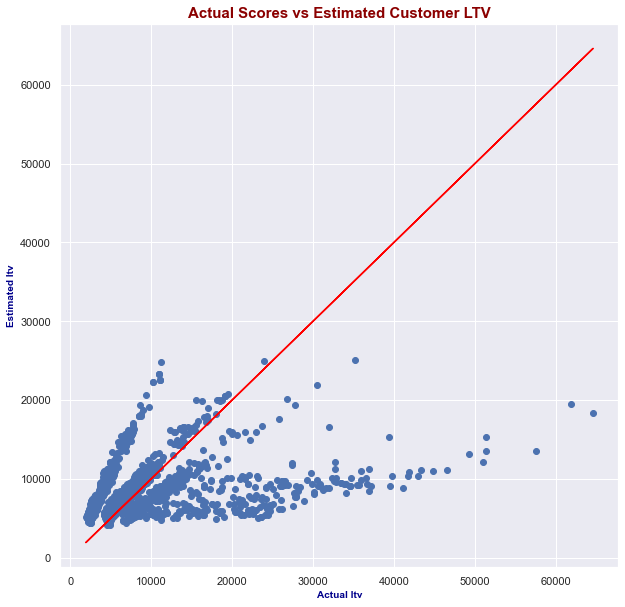

In [96]:
# Model graph to see predictions


header_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
xy_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(10,10))
x4_test = sm.add_constant(x4_test)

y_preds = results.predict(x4_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual ltv", fontdict=xy_font)
plt.ylabel("Estimated ltv", fontdict=xy_font)
plt.title("Actual Scores vs Estimated Customer LTV", fontdict=header_font)
plt.show()

# not a good prediction !


TypeError: unsupported operand type(s) for /: 'str' and 'int'

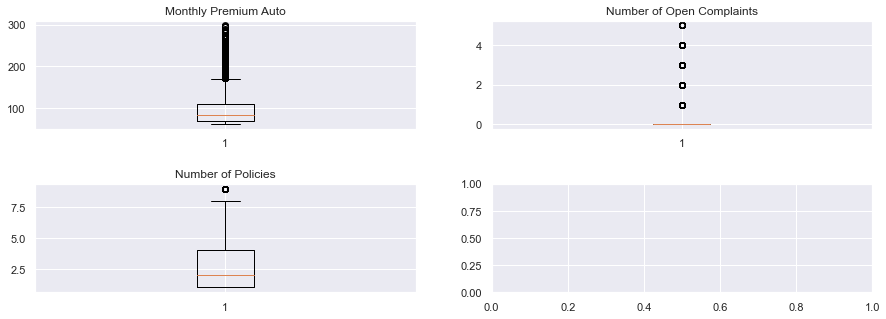

In [82]:
# Looking at outliers

significant_cols_

sns.set(color_codes=True)
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)

for i in range(len(significant_cols)):
    plt.subplot(7,2,i+1)
    plt.boxplot(df[significant_cols[i]])
    plt.title(significant_cols[i])
    
plt.show()


In [90]:
all_df[significant_cols].columns

Index(['Monthly Premium Auto', 'Number of Open Complaints',
       'Number of Policies', 'Response', 'Education', 'Marital Status',
       'Renew Offer Type'],
      dtype='object')

In [103]:
all_df2 =all_df.copy()
all_df2['Monthly Premium Auto'] = winsorize(all_df2['Monthly Premium Auto'],(0, 0.05))
all_df2['Number of Open Complaints'] = winsorize(all_df2['Number of Open Complaints'],(0, 0.05))
all_df2['Number of Policies'] = winsorize(all_df2['Number of Policies'],(0, 0.05))



In [107]:
# define regression with winsorize values (without outliers)

x5 = all_df2[['Monthly Premium Auto','Number of Open Complaints','Number of Policies','Response','Education','Marital Status','Renew Offer Type']]

x5 = sm.add_constant(x5)
results = sm.OLS(y, x5).fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.155
Model:                                 OLS   Adj. R-squared:                  0.155
Method:                      Least Squares   F-statistic:                     239.6
Date:                     Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                             14:22:47   Log-Likelihood:                -92889.
No. Observations:                     9134   AIC:                         1.858e+05
Df Residuals:                         9126   BIC:                         1.859e+05
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -287.1371    298.441     -0.962      0.336    -872.147     297.873
Monthly Premium Auto         95.9353      2.409     39.819      0.000      91.213     100.658
Number of Open Complaints  -236.3592     82.897     -2.851      0.004    -398.855     -73.863
Number of Policies           83.1101     29.099      2.856      0.004      26.070     140.150
Response                   -398.9679    192.424     -2.073      0.038    -776.161     -21.775
Education                    86.9380     47.992      1.812      0.070      -7.137     181.013
Marital Status             -376.5264    104.378     -3.607      0.000    -581.131    -171.922
Renew Offer Type           -278.3731     67.286     -4.137      0.000    -410.268    -146.478
==============================================================================
Omnibus:                     5780.236   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70880.119
Skew:                           2.901   Prob(JB):                         0.00
Kurtosis:                      15.352   Cond. No.                         442.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# again not a good one!


In [110]:
all_df3 = all_df.copy()

In [111]:
x6 = np.log(all_df3[['Monthly Premium Auto','Number of Open Complaints','Number of Policies','Response','Education','Marital Status','Renew Offer Type']])

x6 = sm.add_constant(x6)
results = sm.OLS(y, x6).fit()
results.summary()




LinAlgError: SVD did not converge